# ARTIFICIAL NEURAL NETWORKS(ANN)  
### DATE: 1/23/2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Single Neuron

### Relu Activation

In [2]:
#relu for a single number
# def relu(X):
#     return X if X > 0 else 0

In [3]:
X = np.linspace(-10,10)

In [4]:
X > 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [5]:
True * 7#python automatically treats booleans as 1 if multiplied by a numeric type

7

### timing relu implementations

In [6]:
# %%timeit
# np.max(X,0)

In [7]:
# %%timeit
# X * X>0

In [8]:
# %%timeit
# np.multiply(X, X>0)

X * (X>0) is the fastest implementation

In [9]:
def relu(X):
    return X*(X > 0) #element-wise matrix multiplication by boolean value of whether each element in X is > 0 

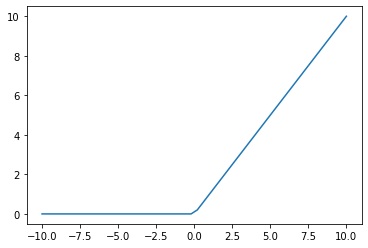

In [10]:
plt.plot(X, relu(X))

### derivative of relu

In [11]:
def relu_prime(X):
    return (X > 0).astype(int)

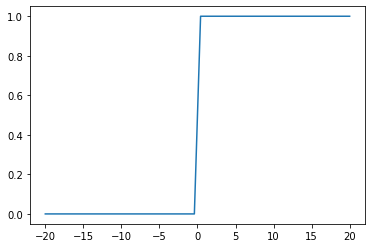

In [12]:
X = np.linspace(-20,20)
plt.plot(X,relu_prime(X))

#### Calculate using vector product (dot product)

\begin{equation*}
z_n^{[l]} = relu(w_1x_1 + w_2x_2 + w_3x_3 + ... + w_nx_n) = relu(W_n^lA^{[l-1]}) + B
\end{equation*}

In [13]:
weights = np.array([[1,2,3,4]])   #1x4

In [14]:
inputs = np.array([[1,2,3,4]]).T #4x1

In [15]:
b = 1

In [16]:
a1 = np.dot(weights, inputs) + b

In [17]:
a1

array([[31]])

In [18]:
relu(a1)

array([[31]])

In [19]:
assert(relu(a1) == relu(1*1 + 2*2 + 3*3 + 4*4 + 1))

## multi neuron layer (4 neurons, 3 inputs)

\begin{equation*}
Z^{[l]} = relu(W^lZ^{[l-1]}) + B
\end{equation*}

**initiate weights** (random initalization.... but this can be changed) setting weights to ALL ZEROS will prevent training....

In [20]:
W = np.random.rand(4,3)

In [21]:
display(W, W.shape)

array([[0.05181866, 0.60719871, 0.10495422],
       [0.76042275, 0.57390748, 0.72774804],
       [0.4576625 , 0.27463537, 0.0537613 ],
       [0.16706398, 0.33194475, 0.06382824]])

(4, 3)

In [22]:
X = np.random.rand(1,3)

In [23]:
display(X, X.shape)

array([[0.34150469, 0.96356007, 0.6969006 ]])

(1, 3)

In [24]:
B = np.random.rand(4,1)
B

array([[0.94652045],
       [0.44831137],
       [0.38749516],
       [0.94044058]])

In [25]:
W.shape, B.shape, X.shape

((4, 3), (4, 1), (1, 3))

In [26]:
A = np.dot(W,X.T) + B

In [27]:
display(A, A.shape)

array([[1.62243185],
       [1.76816168],
       [0.845883  ],
       [1.36182436]])

(4, 1)

In [28]:
Z = relu(A)

In [29]:
display(Z, Z.shape)

array([[1.62243185],
       [1.76816168],
       [0.845883  ],
       [1.36182436]])

(4, 1)

In [30]:
(Z == [relu(a) for a in A]).all()

True

## Backward propagation

backward propagation is performed by calculating the loss from a sample with respect to the network parameters, W and B, and then taking the gradient of the Loss function and adjusting the parameters toward a global minimum using a gradient-based optimization function(SGD, RMSPROP, ADAM, RADAM).

### Loss Function and Cost Function

loss vs cost: a loss function is a measure of the error between a single training sample where as a cost function is more general such as a measure of the sum of loss or average loss

When choosing a loss function you want to be certain that the adjustment of your loss function represents what objective you are trying to achieve and that it maps onto a high-dimensional surface that is easily navigable by gradient-based optimization algorithms.

In the case of ANNs when performing classification we can think of the ouputs as the probability that the network belongs to a particular class, therefore it is outputting its own estimate of the sample distribution. Therefore, under the maximum likelihood framework, we will use cross-entropy loss, $\ell$ which measures the difference between two distributions and the cost, $J$, will be the average loss

\begin{equation*}
\ell_i = -(y_i*log(\hat{y_i}) + (1-y_i)*log(1-\hat{y_i}))
\end{equation*}

\begin{equation*}
J = \frac{1}{N}\sum_i^N{\ell_i} \\
J = -\frac{1}{N}\sum_i^N{y_i*log(\hat{y_i}) + (1-y_i)*log(1-\hat{y_i})}
\end{equation*}

see [here](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) for more info

In [31]:
def calculate_cost(Y_pred,Y_true):
    N = Y_pred.shape[0]
    return -(1/N)*np.sum(Y_true*np.log(Y_pred) + (1-Y_true)*np.log(1-Y_pred))

#### random cost

In [32]:
Y_true = np.random.randint(0,2,(3,1))
Y_pred = np.random.rand(3,1)
Y_true, Y_pred

(array([[0],
        [0],
        [0]]), array([[0.15481054],
        [0.20694997],
        [0.71984796]]))

In [33]:
calculate_cost(Y_pred, Y_true)

0.5574954207255125

#### check limits of cost

##### Y_actual = 1

Text(0, 0.5, 'cost')

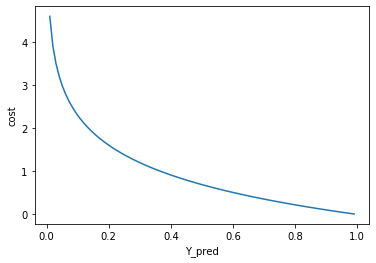

In [34]:
Y_pred = np.linspace(0.01,1,100,endpoint=False)
Y_true = np.ones(100)
costs = [calculate_cost(np.array(y_pred).reshape((1,1)), np.array(y_true).reshape((1,1))) for (y_pred, y_true) in zip(Y_pred,Y_true)]
plt.plot(Y_pred, costs)
plt.xlabel('Y_pred')
plt.ylabel('cost')

##### Y_actual = 0

Text(0, 0.5, 'cost')

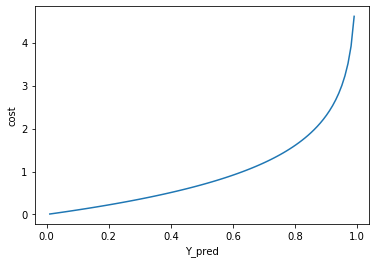

In [35]:
Y_pred = np.linspace(0.01,1,100,endpoint=False)
Y_true = np.zeros(100)
costs = [calculate_cost(np.array(y_pred).reshape((1,1)), np.array(y_true).reshape((1,1))) for (y_pred, y_true) in zip(Y_pred,Y_true)]
plt.plot(Y_pred, costs)
plt.xlabel('Y_pred')
plt.ylabel('cost')

it works!

## Gradients of loss function

### Derivative of Cross Entropy Loss

\begin{equation*}
J = \frac{1}{N}\sum_{i=0}^N{\ell_i} \\
\ell_i = y_i*log(\hat{y_i}) + (1-y_i)*log(1-\hat{y_i})
\end{equation*}

# putting it all together

In [36]:
import numpy as np

class ANN:
    class Layer:
        def __init__(self, shape:tuple, activation='relu'):
            self.shape = shape
            self.W = np.random.rand(*self.shape)
            self.B = np.zeros((self.shape[0],1))
            self.activation = self.relu if activation == 'relu' else self.sigmoid
            self.activation_prime = self.relu_prime if activation == 'relu' else self.sigmoid_prime
            self.A = None
            self.Z = None

        def relu(self, Z):
            return Z*(Z > 0) #element-wise matrix multiplication by boolean value of whether each element in X is > 0 (a.k.a relu)
        
        def relu_prime(self, Z):
            return (Z>0).astype(int)
        
        def sigmoid(self, Z):
            return 1/(1 + np.exp(-Z))
        
        def sigmoid_prime(self, Z):
            return self.sigmoid(Z) * (1 - self.sigmoid(Z))
           
        def activate(self, a_prev):
            self.Z = np.dot(self.W, a_prev) + self.B
            self.A = self.activation(self.Z)
            return self.A
        
        def activate_backwards(self, Z):
            return self.activation_prime(Z)
        
        def update(self, dW, dB, learning_rate):
            self.W -= learning_rate * dW
            self.B -= learning_rate * dB
            
    def __init__(self, input_shape=None, n_layers=1, layer_dims=None, learning_rate=0.01, n_classes = 2):
        self.input_shape = (3,1) if input_shape is None else input_shape
        self.learning_rate = learning_rate

        #input layer
        self.layers = [self.Layer((np.random.randint(1,5), self.input_shape[0]))]
        #hidden layers
        for l in range(n_layers):
            n_nodes = np.random.randint(2,5)
            n_prev_nodes = self.layers[l].shape[0]
            layer_shape = (n_nodes, n_prev_nodes)
            self.layers.append(self.Layer(shape=layer_shape))
        #output layer
        n_nodes = n_classes if n_classes > 2 else 1
        n_prev_nodes = self.layers[-1].shape[0]
        self.output_shape = (n_nodes, n_prev_nodes)
        self.layers.append(self.Layer(shape=self.output_shape, activation='sigmoid'))
            
    def calculate_cost(self, Y_pred,Y_true):
        N = Y_pred.shape[0]
        return -(1/N)*np.sum(Y_true*np.log(Y_pred) + (1-Y_true)*np.log(1-Y_pred))
    
    def forward_pass(self, X):
        A = X.reshape(self.input_shape)
        for layer in self.layers:
            A = layer.activate(A)
        return A
    
    def backward_pass(self, Y_pred, Y_true, learning_rate=None):
        if learning_rate is None:
            learning_rate = self.learning_rate
        cost = self.calculate_cost(Y_pred, Y_true)
        dA = (Y_true/Y_pred) + ((1-Y_true)/(1-Y_pred))
        backward_layers = reversed(list(enumerate(self.layers)))
        for l_prev, layer in backward_layers:
            M = self.layers[l_prev].A.shape[0]
            dZ = layer.activate_backwards(layer.Z)
            dW = np.dot(self.layers[l_prev].A.T, dA*dZ)   
            dB = np.sum(dZ, axis=1, keepdims=True)/M
            layer.update(dW, dB, learning_rate)
            dA = np.dot(layer.W.T, dA*dZ)
        return cost
        
    def fit(self, X_train, y_train, num_iterations = np.inf, learning_rate=None):
        i = 0
        for (x,y_true) in zip(X_train, y_train):
            #TODO: implement batch vectorization
            #TODO: implement batch gradient descent
            Y_pred = self.forward_pass(x)
            cost = self.backward_pass(Y_pred, y_true)
            i += 1
            if i % 100 == 0:
                print(f'iteration {i} cost:{cost}')
            if i == num_iterations:
                return cost
        return cost
        
    

# Testing it out

## Initialize network

In [37]:
ann = ANN(input_shape=(3,1), n_layers = 3)

In [38]:
for i, layer in enumerate(ann.layers[1:]):
    prev_layer = ann.layers[i]
    print(i, prev_layer.shape, layer.shape)
    print(layer.shape[1] == prev_layer.shape[0])

0 (1, 3) (4, 1)
True
1 (4, 1) (3, 4)
True
2 (3, 4) (2, 3)
True
3 (2, 3) (1, 2)
True


### Create single random sample vector and random binary label

In [39]:
X = np.random.rand(1,3)
X

array([[0.7272164 , 0.90921327, 0.9852942 ]])

In [40]:
Y_true = np.random.randint(1, size=(1))
Y_true

array([0])

## forward pass 

In [41]:
Y_pred = ann.forward_pass(X)
Y_pred

array([[0.9355667]])

In [42]:
Y_pred.shape

(1, 1)

In [43]:
ann.backward_pass(Y_pred, Y_true)

2.7421246255346357

In [79]:
ann.backward_pass(Y_pred, Y_true)

2.7421246255346357

In [80]:
input_shape = (10,10)
n_samples = 1000
ann = ANN(input_shape=input_shape, n_layers=2)
X_train = np.random.rand(n_samples, *input_shape)
y_train = np.random.randint(1, size=(n_samples,1,1))
ann.fit(X_train, y_train, verbosity=0e)

SyntaxError: invalid syntax (<ipython-input-80-ea4bab947e3e>, line 6)

In [55]:
y_train

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'